In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

We have combined data that have been collected through the entire day from the Master Log GCP Bucket. The data comes from 01-04-2024 and 01-05-2024.

In [2]:
PATH = 'EDA_files/'

In [3]:
def EDA_file_generator(path):
    for file in os.listdir(path):
        if file.endswith('.json'):
            yield file

In [4]:
# Loading data
eda_gen = EDA_file_generator(PATH)

for i, file in enumerate(eda_gen):
    if i == 1:
        break
    df_eda = pd.DataFrame(pd.read_json(PATH+file, typ='series')).transpose()
    
num_files = len(os.listdir(PATH)) - 1

from tqdm.auto import tqdm

for file in tqdm(eda_gen, total=num_files):
    df = pd.DataFrame(pd.read_json(PATH+file, typ='series')).transpose()
    df_eda = pd.concat([df_eda, df])

  0%|          | 0/52770 [00:00<?, ?it/s]

In [183]:
df_eda = df_eda.reset_index()

In [5]:
df_eda.shape

(52764, 7)

In [6]:
# All the files

df_eda.head()

,global_id,author,created_time,desc,score,url,source
0,02Zyk8U-imgur,AzrielStrife,2024-01-04T21:13:08,The Fly https://youtu.be/ECFAMTEnvqw?si=s5tePl...,3,https://i.imgur.com/02Zyk8U.jpg,imgur
0,02Zyk8U-imgur,AzrielStrife,2024-01-04T21:13:08,The Fly https://youtu.be/ECFAMTEnvqw?si=s5tePl...,3,https://i.imgur.com/02Zyk8U.jpg,imgur
0,02Zyk8U-imgur,AzrielStrife,2024-01-04T21:13:08,The Fly https://youtu.be/ECFAMTEnvqw?si=s5tePl...,3,https://i.imgur.com/02Zyk8U.jpg,imgur
0,02Zyk8U-imgur,AzrielStrife,2024-01-04T21:13:08,The Fly https://youtu.be/ECFAMTEnvqw?si=s5tePl...,3,https://i.imgur.com/02Zyk8U.jpg,imgur
0,02Zyk8U-imgur,AzrielStrife,2024-01-04T21:13:08,The Fly https://youtu.be/ECFAMTEnvqw?si=s5tePl...,3,https://i.imgur.com/02Zyk8U.jpg,imgur


In [186]:
df_eda_no_d = df_eda.drop_duplicates('global_id').reset_index()

In [187]:
df_eda_no_d

,level_0,index,global_id,author,created_time,desc,score,url,source
0,0,0,02Zyk8U-imgur,AzrielStrife,2024-01-04T21:13:08,The Fly https://youtu.be/ECFAMTEnvqw?si=s5tePl...,3,https://i.imgur.com/02Zyk8U.jpg,imgur
1,5,0,04FNenk-imgur,Tinkywink,2024-01-05T00:33:49,None,6,https://i.imgur.com/04FNenk.jpg,imgur
2,10,0,0at1r90-imgur,linexnewt,2024-01-04T23:16:24,Music by Queen,4,https://i.imgur.com/0at1r90.jpg,imgur
3,15,0,0BoiFPH-imgur,jensyao,2024-01-04T01:45:11,None,-3,https://i.imgur.com/0BoiFPH.jpg,imgur
4,21,0,0BTHRI5-imgur,VanessaBludgeons,2024-01-05T06:54:57,Poster for the series V,3,https://i.imgur.com/0BTHRI5.jpg,imgur
...,...,...,...,...,...,...,...,...,...
2403,52699,0,ZYtYXRE-imgur,rybe390,2024-01-04T14:01:36,Paint the brown,-1,https://i.imgur.com/ZYtYXRE.jpg,imgur
2404,52705,0,ZYvkkJl-imgur,monjamon,2024-01-04T19:07:19,Taking a break after a little training session...,7,https://i.imgur.com/ZYvkkJl.jpg,imgur
2405,52711,0,zZ0NDm3-imgur,TinkerThinker42,2024-01-04T05:21:07,Welcome to Day 1078.\n\nToday in one sentence:...,2,https://i.imgur.com/zZ0NDm3.png,imgur
2406,52723,0,ZZqmxW1-imgur,hutaoimpact,2024-01-04T04:49:15,None,4,https://i.imgur.com/ZZqmxW1.jpg,imgur


In [10]:
# Only original images

df_eda_no_d

,global_id,author,created_time,desc,score,url,source
0,02Zyk8U-imgur,AzrielStrife,2024-01-04T21:13:08,The Fly https://youtu.be/ECFAMTEnvqw?si=s5tePl...,3,https://i.imgur.com/02Zyk8U.jpg,imgur
0,04FNenk-imgur,Tinkywink,2024-01-05T00:33:49,None,6,https://i.imgur.com/04FNenk.jpg,imgur
0,0at1r90-imgur,linexnewt,2024-01-04T23:16:24,Music by Queen,4,https://i.imgur.com/0at1r90.jpg,imgur
0,0BoiFPH-imgur,jensyao,2024-01-04T01:45:11,None,-3,https://i.imgur.com/0BoiFPH.jpg,imgur
0,0BTHRI5-imgur,VanessaBludgeons,2024-01-05T06:54:57,Poster for the series V,3,https://i.imgur.com/0BTHRI5.jpg,imgur
...,...,...,...,...,...,...,...
0,ZYtYXRE-imgur,rybe390,2024-01-04T14:01:36,Paint the brown,-1,https://i.imgur.com/ZYtYXRE.jpg,imgur
0,ZYvkkJl-imgur,monjamon,2024-01-04T19:07:19,Taking a break after a little training session...,7,https://i.imgur.com/ZYvkkJl.jpg,imgur
0,zZ0NDm3-imgur,TinkerThinker42,2024-01-04T05:21:07,Welcome to Day 1078.\n\nToday in one sentence:...,2,https://i.imgur.com/zZ0NDm3.png,imgur
0,ZZqmxW1-imgur,hutaoimpact,2024-01-04T04:49:15,None,4,https://i.imgur.com/ZZqmxW1.jpg,imgur


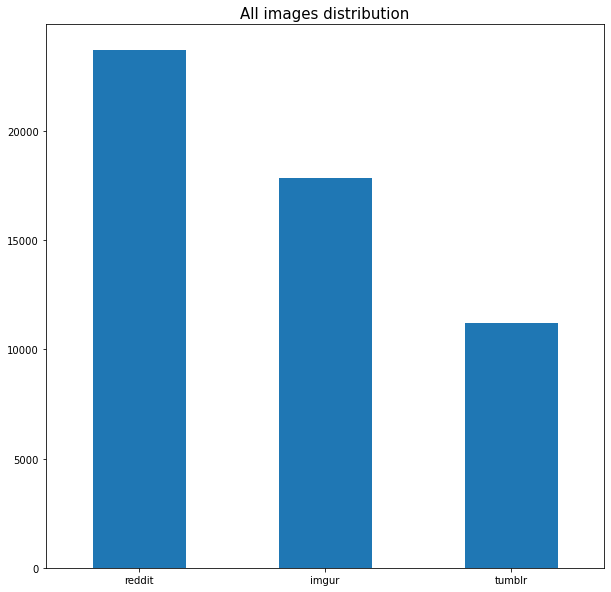

In [32]:
plt.figure(figsize=(10,10))
df_eda['source'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("All images distribution", size=15)
plt.show()

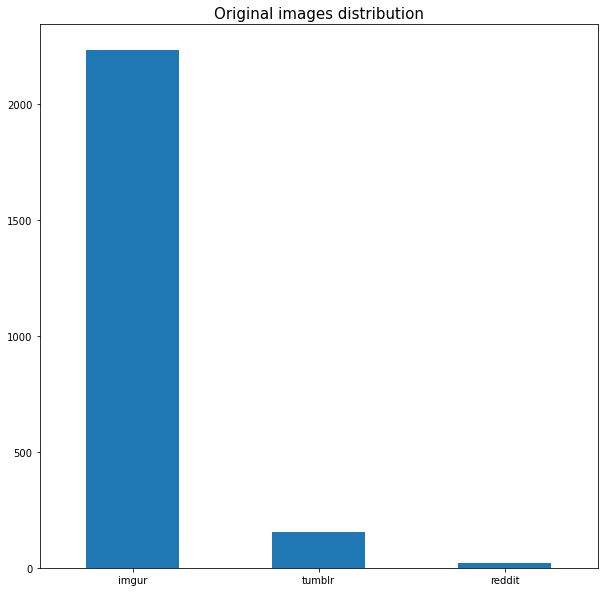

In [30]:
plt.figure(figsize=(10,10))
df_eda_no_d['source'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Original images distribution", size=15)
plt.show()

As we can see, Reddit dominates overall in the number of images, but most of them are duplicates. Imgur dominates in original images.

In [33]:
desc_dict = {"Non_none":0,
            "None":0}

In [38]:
for desc in df_eda_no_d['desc']:
    if desc is None:
        desc_dict["None"] += 1
    else:
        desc_dict["Non_none"] += 1

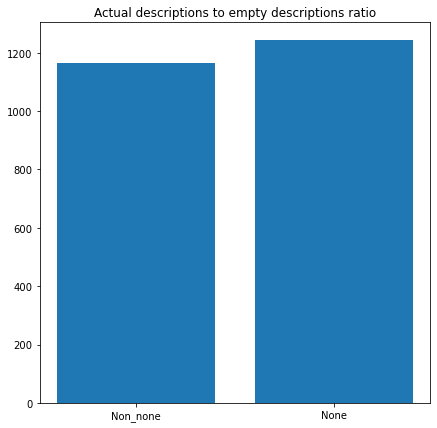

In [46]:
plt.figure(figsize=(7,7))
plt.bar(*zip(*desc_dict.items()))
plt.title("Actual descriptions to empty descriptions ratio")
plt.show()

Now let us check the distribution of scores.

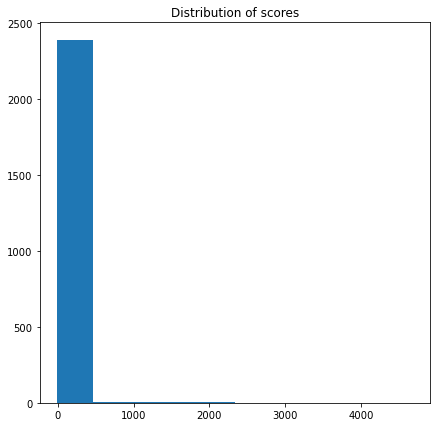

In [128]:
plt.figure(figsize=(7,7))
df_eda_no_d['score'].hist()
plt.title("Distribution of scores")
plt.grid(False)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Number of scores", fontsize=12)
plt.show()

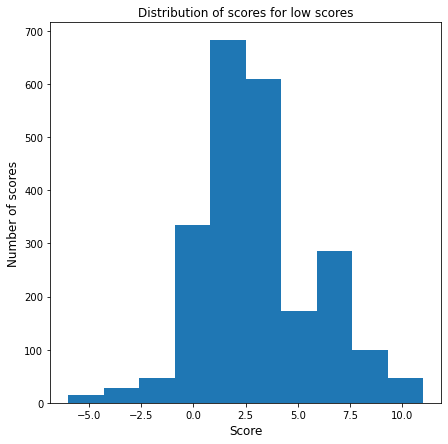

In [211]:
plt.figure(figsize=(7,7))
df_eda_no_d[df_eda_no_d['score'] < 12]['score'].hist()
plt.title("Distribution of scores for low scores")
plt.grid(False)
plt.xlabel("Score", fontsize=12)
plt.ylabel("Number of scores", fontsize=12)
plt.show()

Also listing some basic characteristics

In [48]:
max(df_eda_no_d['score'])

4682

In [51]:
min(df_eda_no_d['score'])

-6

In [50]:
np.mean(df_eda_no_d['score'])

17.92981727574751

In [52]:
np.median(df_eda_no_d['score'])

3.0

Distribution of repeats

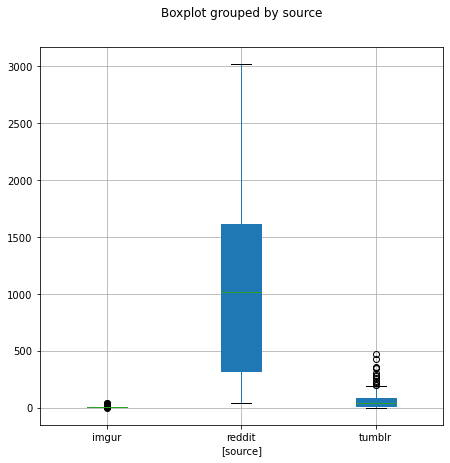

In [101]:
plt.figure(figsize=(7,7))
ax = plt.gca()
df_eda.groupby(["source", "global_id"]).count()['author'].reset_index()[["source", "author"]].boxplot(by="source", ax=ax, patch_artist=True)
plt.title("")
plt.show()

In [93]:
max_eda = max(df_eda.groupby(["source", "global_id"]).count()['author'])
print(f"The maximal number of repeats: {max_eda}")

The maximal number of repeats: 3017


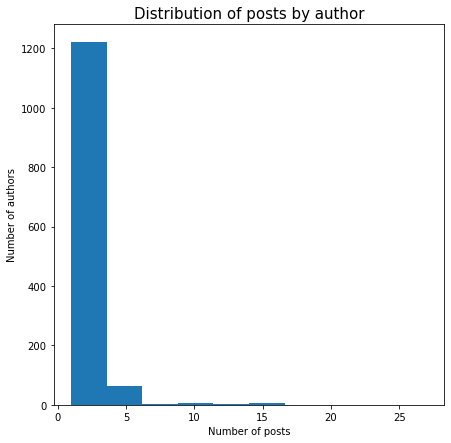

In [127]:
plt.figure(figsize=(7,7))
ax = plt.gca()
df_eda_no_d.groupby('author').count()['global_id'].reset_index().hist(ax=ax)
plt.title("Distribution of posts by author", fontsize=15)
plt.xlabel("Number of posts", fontsize=12)
plt.ylabel("Number of authors", fontsize=12)
plt.grid(False)
plt.show()

In [124]:
author_post_dist = df_eda_no_d.groupby('author').count()['global_id']

In [125]:
print(f"Maximal number of posts by author: {max(author_post_dist)}")

Maximal number of posts by author: 27


In [126]:
df_eda_no_d.groupby('author').count()[author_post_dist == max(author_post_dist)].index[0]

'Crazyzaku'

In [150]:
df_desc = df_eda_no_d['desc'].apply(lambda x: len(x) if x is not None else 0)

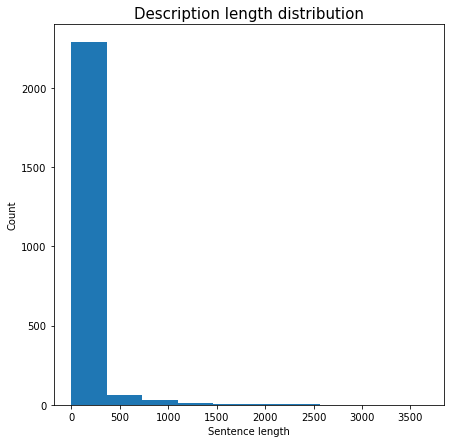

In [149]:
plt.figure(figsize=(7,7))

plt.hist(df_desc)
plt.title("Description length distribution", fontsize=15)
plt.xlabel("Sentence length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [158]:
smaller_df_desc = []
for i in df_desc:
    if i != 0 and i < 500:
        smaller_df_desc.append(i)

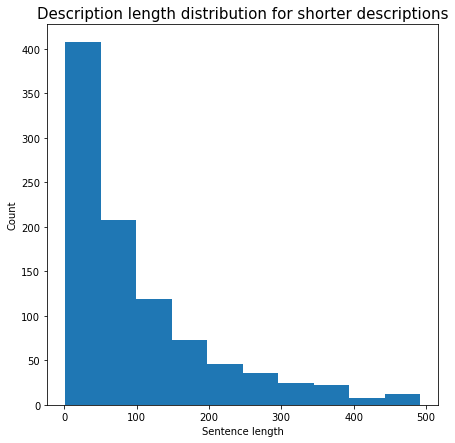

In [160]:
plt.figure(figsize=(7,7))
plt.hist(smaller_df_desc)
plt.title("Description length distribution for shorter descriptions", fontsize=15)
plt.xlabel("Sentence length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

In [162]:
print(f"Longest description length: {max(df_desc)}")

Longest description length: 3666


Let us print the file format distributions

In [172]:
format_desc = {}

for url in df_eda_no_d['url']:
    if len(url.split('.')[-1])>4:
        try:
            format_desc["none"] += 1
        except:
            format_desc["none"] = 1
    else:
        try:
            format_desc[url.split('.')[-1]] += 1
        except:
            format_desc[url.split('.')[-1]] = 1

In [176]:
format_desc

{'jpg': 1945, 'png': 435, 'none': 7, 'jpeg': 12, 'gif': 8, 'webp': 1}

Let us also explore the sizes of images.

In [195]:
import requests
from PIL import Image
import io

headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36'
}

In [201]:
def get_img_size_from_link(link):
    try:
        img_page = requests.get(link, headers=headers)
        if img_page.status_code != 200:
            raise Exception("Couldn't get image")
        image_file = io.BytesIO(img_page.content)
        image = Image.open(image_file)
        return image.size

    except Exception as e:
        return None 

In [216]:
sizes = []
colors = []
color_dict = {"imgur":"lightgreen",
             "reddit":"red",
             "tumblr":"lightblue"}
for i, url in enumerate(df_eda_no_d['url']):
    size = get_img_size_from_link(url)
    if size is not None:
        sizes.append(size)
        colors.append(color_dict[df_eda_no_d['source'][i]])

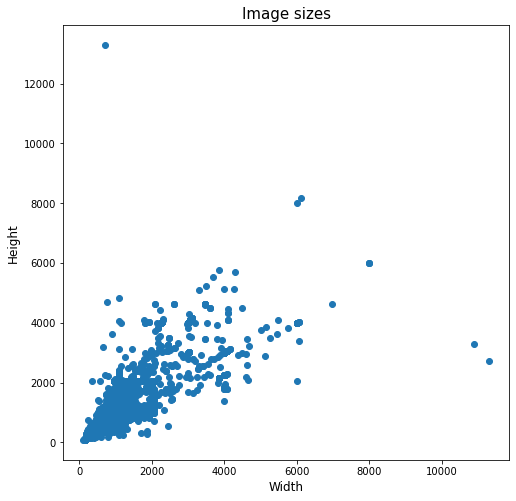

In [221]:
plt.figure(figsize=(8,8))
plt.scatter(np.array(sizes).T[0], np.array(sizes).T[1])
plt.title("Image sizes", fontsize=15)
plt.xlabel("Width", fontsize=12)
plt.ylabel("Height", fontsize=12)

plt.show()

In [224]:
img_reddit = np.array(sizes)[np.where(np.array(colors)=="red")]
img_imgur = np.array(sizes)[np.where(np.array(colors)=="lightgreen")]
img_tumblr = np.array(sizes)[np.where(np.array(colors)=="lightblue")]

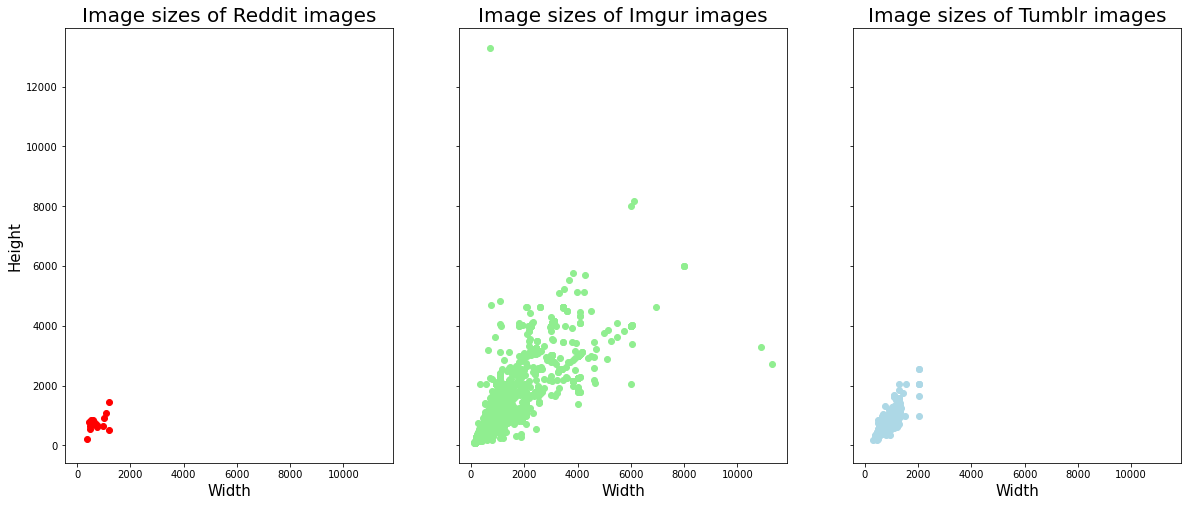

In [233]:
fig, ax = plt.subplots(1, 3, figsize=(20,8), sharey=True, sharex=True)
ax[0].scatter(img_reddit.T[0], img_reddit.T[1], c='red')
ax[0].set_title("Image sizes of Reddit images", fontsize=20)
ax[0].set_xlabel("Width", fontsize=15)
ax[0].set_ylabel("Height", fontsize=15)

ax[1].scatter(img_imgur.T[0], img_imgur.T[1], c='lightgreen')
ax[1].set_title("Image sizes of Imgur images", fontsize=20)
ax[1].set_xlabel("Width", fontsize=15)

ax[2].scatter(img_tumblr.T[0], img_tumblr.T[1], c='lightblue')
ax[2].set_title("Image sizes of Tumblr images", fontsize=20)
ax[2].set_xlabel("Width", fontsize=15)
plt.show()